In [1]:
# Load modules
import numpy as np
from scipy.interpolate import interp1d 
from matplotlib import pyplot as pl

# For ipynb only
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pl.rc('text', usetex=True)
pl.rc('font', family='serif')
pl.rc('font', size='20')

In [2]:
# Simulation parameters
c = 299792.458
h = 0.67556 
n_s = 0.9619
A_s = 2.215e-9
omega_cdm = 0.12038
omega_b = 0.022032
omega_k = 0.0
k_pivot = 0.05
N_ur = 3.046
N_ncdm = 0.0
T_cmb = 2.7255
Omega_m = (omega_cdm + omega_b)/h**2
w=-1.0

# N-body's particles mass
part_m = 2.64222e+09 # Msun/h

# Centre of the redshift bin
zcen = 0.0

In [3]:
# Generate input power spectrum to compute the variance
# I'm using CLASS, but can be any other power spectrum, computed at the redshift of analysis.

from classy import Class

class_settings = {'output': 'mPk', 
                  'lensing': 'no',
                  'h': h, 
                  'n_s': n_s,
                  'A_s': A_s, 
                  'omega_cdm': omega_cdm, 
                  'omega_b': omega_b,
                  'Omega_k': 0.0,
                  'k_pivot': k_pivot,
                  'z_max_pk': 10.,
                  'N_ur': N_ur,
                  'N_ncdm': N_ncdm, 
                  'T_cmb': T_cmb,
                  'P_k_max_1/Mpc': 500}

# Useful stuff 
kvec = np.logspace(-4., np.log10(500), 1000)

# Planck values    
pclass = Class()
pclass.set(class_settings)
pclass.compute()

bg = pclass.get_background()

# P(k) at zcen
pk_class_zcen = np.array([pclass.pk(_k, zcen) for _k in kvec])

comov = interp1d(bg['z'],h*bg['comov. dist.'])
H = interp1d(bg['z'],(c/h)*bg['H [1/Mpc]'])
fz = interp1d(bg['z'],bg['gr.fac. f'])

z_tmp = np.linspace(0,10,1000)
r_tmp = comov(z_tmp)
get_z = interp1d(r_tmp,z_tmp)
get_r = interp1d(z_tmp,r_tmp)

# Halo mass function and bias

In [4]:
interpol = interp1d(kvec/h,(h**3.0)*pk_class_zcen)
k = np.logspace(-3,2,100)

# Initialise halo tools with the input power spectrum 
import halo_tools as halos
ht = halos.halo_tools(k,interpol(k))

In [5]:
mass = np.logspace(12,15,100)
tk_mf = ht.mass_function(mass,zcen,0)
ps_mf = ht.mass_function(mass,zcen,2)
st_mf = ht.mass_function(mass,zcen,3)

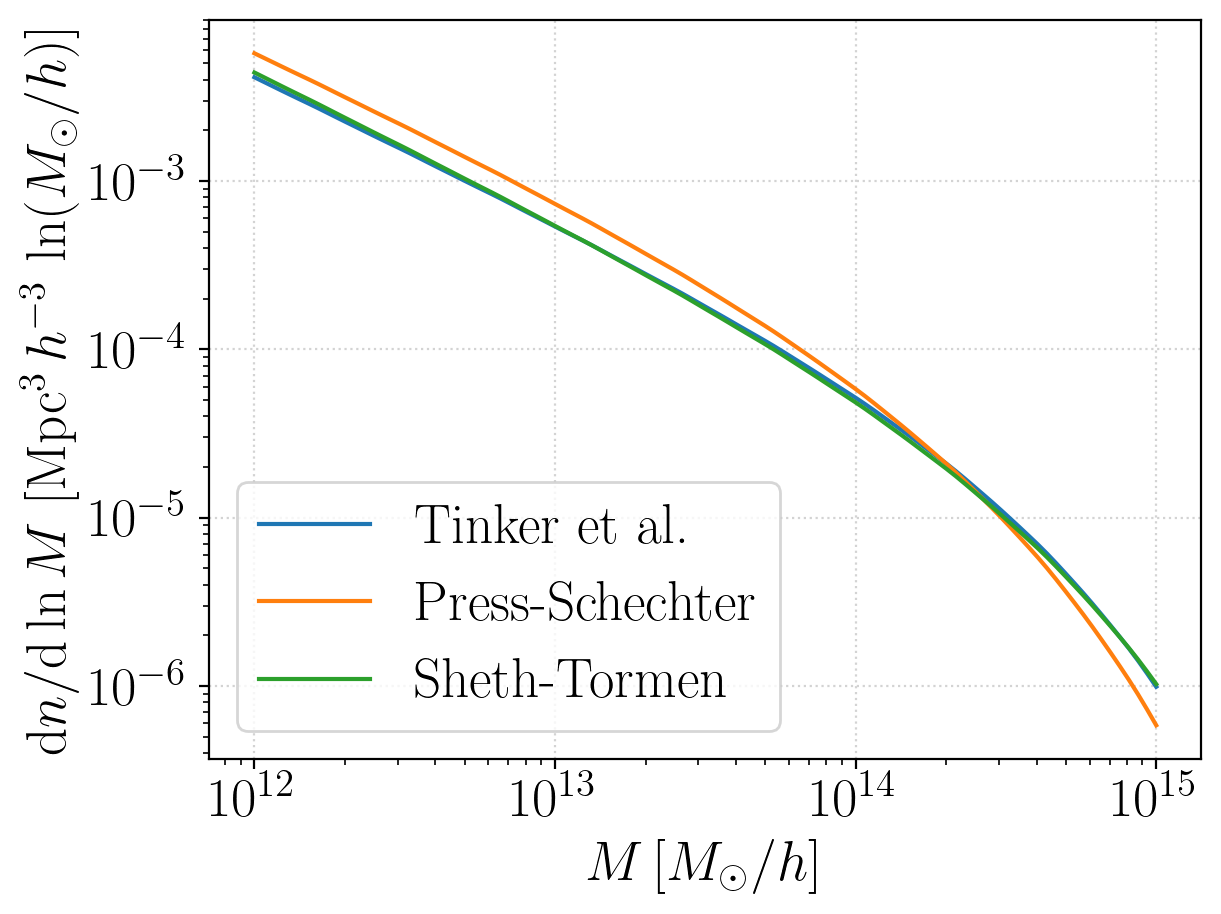

In [6]:
pl.loglog(mass,tk_mf,label=r'Tinker et al.')
pl.loglog(mass,ps_mf,label=r'Press-Schechter')
pl.loglog(mass,st_mf,label=r'Sheth-Tormen')
pl.legend()
pl.xlabel(r'$M\, [M_{\odot}/h]$')
pl.grid(ls=':',c='lightgrey')
pl.ylabel(r'${\rm d}n/{\rm d}\ln M$ [Mpc$^3\, h^{-3}\, \ln(M_{\odot}/h)$]');